# SPACEL workflow (2/3): Identification of spatial domain by Splane on mouse brain ST dataset

July 2023

Dataset: 75 ST slices of mouse brain ([here](https://zenodo.org/record/8167488))

In [5]:
cd /data/1122


/data/1122


In [8]:
pwd


'/data/1122'

In [7]:
import sys
sys.path.append('/data/1122/GraphCellNet')

In [9]:
import pandas as pd
import scanpy as sc
import anndata
import numpy as np
import sys
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.metrics.cluster import adjusted_rand_score

In [10]:
import GraphCellNet
from GraphCellNet import Graph_model

Global seed set to 0


In [11]:
adata = sc.read('/data/1122/SPACEL-l/docs/data/visium_human_DLPFC/st_ad.h5ad')

In [12]:
adata

AnnData object with n_obs × n_vars = 47681 × 5108
    obs: 'in_tissue', 'array_row', 'array_col', 'imagecol', 'imagerow', 'GT', 'slice', 'n_genes', 'batch', 'Exc L2-3 LINC00507 RPL9P17', 'Exc L6 THEMIS LINC00343', 'Exc L4-5 RORB LINC01474', 'Exc L4-5 RORB RPL31P31', 'Oligo L4-6 OPALIN', 'Exc L2-4 RORB GRIK1', 'Exc L4-5 RORB LCN15', 'Exc L4 RORB BHLHE22', 'Exc L6 FEZF2 FAM95C', 'Inh L3-5 SST MAFB', 'Astro L1-6 FGFR3 ETNPPL', 'Exc L3-4 RORB PRSS12', 'Exc L6 THEMIS EGR3', 'Inh L2-4 PVALB C8orf4', 'Inh L1-4 LAMP5 DUSP4', 'OPC L1-6 MYT1', 'Exc L6 FEZF2 VWA2', 'Micro L1-6 C1QC', 'Inh L4-6 SST MTHFD2P6', 'Inh L1 LAMP5 NDNF', 'Exc L6 FEZF2 KRT17', 'Exc L3-5 RORB CMAHP', 'Exc L5-6 FEZF2 MYBPHL', 'Inh L5 PVALB CNTNAP3P2', 'Exc L5-6 THEMIS GPR21', 'Inh L1-3 VIP ZNF322P1', 'Exc L3-4 RORB SEMA6D', 'Inh L1 ADARB2 ADAM33', 'Exc L4-5 RORB HNRNPA1P46', 'Exc L4 RORB CACNG5', 'Inh L5-6 LAMP5 SFTA3', 'Exc L5 RORB SNHG7', 'Exc L5-6 THEMIS IL7R', 'Inh L3-4 PVALB HOMER3', 'Exc L3-4 RORB FOLH1B', 'Exc L3 LINC

In [13]:
# 将 'slice' 列转换为字符串类型
adata.obs['slice'] = adata.obs['slice'].astype(str)

adata_list = []
for i in range(12):
    subset = adata[adata.obs['slice'] == str(i)].copy()
    if subset.n_obs > 0:  # 仅添加非空的对象
        adata_list.append(subset)
    else:
        print(f"Slice {i} is empty and will be skipped.")


In [15]:
adata_list_5 = adata_list[4:8]
adata_list_7= adata_list[:4] + adata_list[8:]


## Training model

In [16]:
model = Graph_model.init_model(adata_list_7, n_clusters=7,use_gpu=True,n_neighbors=7,k=7,gnn_dropout=0.4) 
model.train(d_l=0.5)

Setting global seed: 42
Calculating cell type weights...
Generating GNN inputs...
Calculating largest eigenvalue of normalized graph Laplacian...
Calculating Chebyshev polynomials up to order 7...
Setting the weight of similarity loss to 5.304


The best epoch 0 total loss=-6.288 g loss=-5.215 d loss=2.147 d acc=0.131 simi loss=-0.990 db loss=1.282:   0%|          | 1/300 [00:02<14:48,  2.97s/it]

Predicted labels: [3 0 3 ... 6 6 1]


The best epoch 5 total loss=-6.515 g loss=-5.443 d loss=2.145 d acc=0.171 simi loss=-0.994 db loss=0.760:   2%|▏         | 6/300 [00:06<05:36,  1.15s/it]

Predicted labels: [0 2 0 ... 4 6 0]


The best epoch 10 total loss=-6.550 g loss=-5.486 d loss=2.127 d acc=0.184 simi loss=-0.995 db loss=0.663:   4%|▎         | 11/300 [00:10<04:57,  1.03s/it]

Predicted labels: [2 0 2 ... 4 3 2]


The best epoch 15 total loss=-6.548 g loss=-5.490 d loss=2.116 d acc=0.176 simi loss=-0.995 db loss=0.635:   5%|▌         | 16/300 [00:13<04:41,  1.01it/s]

Predicted labels: [0 6 0 ... 2 5 0]


The best epoch 15 total loss=-6.548 g loss=-5.490 d loss=2.116 d acc=0.176 simi loss=-0.995 db loss=0.635:   7%|▋         | 21/300 [00:17<04:34,  1.02it/s]

Predicted labels: [0 2 0 ... 3 5 0]


The best epoch 25 total loss=-6.598 g loss=-5.546 d loss=2.104 d acc=0.181 simi loss=-0.996 db loss=0.601:   9%|▊         | 26/300 [00:21<04:36,  1.01s/it]

Predicted labels: [6 5 6 ... 3 2 1]


The best epoch 30 total loss=-6.607 g loss=-5.557 d loss=2.099 d acc=0.180 simi loss=-0.996 db loss=0.588:  10%|█         | 31/300 [00:24<04:32,  1.01s/it]

Predicted labels: [0 4 0 ... 2 5 6]


The best epoch 35 total loss=-6.620 g loss=-5.572 d loss=2.096 d acc=0.177 simi loss=-0.996 db loss=0.588:  12%|█▏        | 36/300 [00:28<04:45,  1.08s/it]

Predicted labels: [5 3 0 ... 2 1 5]


The best epoch 35 total loss=-6.620 g loss=-5.572 d loss=2.096 d acc=0.177 simi loss=-0.996 db loss=0.588:  14%|█▎        | 41/300 [00:32<04:21,  1.01s/it]

Predicted labels: [0 4 6 ... 3 1 0]


The best epoch 45 total loss=-6.638 g loss=-5.591 d loss=2.095 d acc=0.181 simi loss=-0.996 db loss=0.587:  15%|█▌        | 46/300 [00:35<04:16,  1.01s/it]

Predicted labels: [0 5 6 ... 4 4 0]


The best epoch 45 total loss=-6.638 g loss=-5.591 d loss=2.095 d acc=0.181 simi loss=-0.996 db loss=0.587:  17%|█▋        | 51/300 [00:39<04:08,  1.00it/s]

Predicted labels: [4 6 0 ... 3 3 4]


The best epoch 45 total loss=-6.638 g loss=-5.591 d loss=2.095 d acc=0.181 simi loss=-0.996 db loss=0.587:  19%|█▊        | 56/300 [00:42<03:59,  1.02it/s]

Predicted labels: [5 4 1 ... 3 3 5]


The best epoch 60 total loss=-6.650 g loss=-5.602 d loss=2.096 d acc=0.180 simi loss=-0.996 db loss=0.576:  20%|██        | 61/300 [00:46<04:01,  1.01s/it]

Predicted labels: [0 2 5 ... 6 1 0]


The best epoch 60 total loss=-6.650 g loss=-5.602 d loss=2.096 d acc=0.180 simi loss=-0.996 db loss=0.576:  22%|██▏       | 66/300 [00:50<03:50,  1.01it/s]

Predicted labels: [6 1 3 ... 2 5 6]


The best epoch 60 total loss=-6.650 g loss=-5.602 d loss=2.096 d acc=0.180 simi loss=-0.996 db loss=0.576:  24%|██▎       | 71/300 [00:53<03:46,  1.01it/s]

Predicted labels: [0 3 6 ... 4 1 0]


The best epoch 75 total loss=-6.649 g loss=-5.603 d loss=2.093 d acc=0.183 simi loss=-0.996 db loss=0.571:  25%|██▌       | 76/300 [00:57<03:45,  1.01s/it]

Predicted labels: [0 6 5 ... 4 2 0]


The best epoch 75 total loss=-6.649 g loss=-5.603 d loss=2.093 d acc=0.183 simi loss=-0.996 db loss=0.571:  27%|██▋       | 81/300 [01:00<03:43,  1.02s/it]

Predicted labels: [0 5 2 ... 3 4 0]


The best epoch 75 total loss=-6.649 g loss=-5.603 d loss=2.093 d acc=0.183 simi loss=-0.996 db loss=0.571:  29%|██▊       | 86/300 [01:04<03:42,  1.04s/it]

Predicted labels: [2 4 0 ... 5 3 2]


The best epoch 90 total loss=-6.653 g loss=-5.607 d loss=2.092 d acc=0.183 simi loss=-0.996 db loss=0.567:  30%|███       | 91/300 [01:08<03:44,  1.08s/it]

Predicted labels: [3 2 5 ... 6 4 3]


The best epoch 90 total loss=-6.653 g loss=-5.607 d loss=2.092 d acc=0.183 simi loss=-0.996 db loss=0.567:  32%|███▏      | 96/300 [01:12<03:31,  1.04s/it]

Predicted labels: [1 5 3 ... 4 2 1]


The best epoch 90 total loss=-6.653 g loss=-5.607 d loss=2.092 d acc=0.183 simi loss=-0.996 db loss=0.567:  34%|███▎      | 101/300 [01:15<03:25,  1.03s/it]

Predicted labels: [2 6 0 ... 3 5 2]


The best epoch 90 total loss=-6.653 g loss=-5.607 d loss=2.092 d acc=0.183 simi loss=-0.996 db loss=0.567:  35%|███▌      | 106/300 [01:19<03:16,  1.01s/it]

Predicted labels: [4 6 0 ... 2 5 4]


The best epoch 90 total loss=-6.653 g loss=-5.607 d loss=2.092 d acc=0.183 simi loss=-0.996 db loss=0.567:  37%|███▋      | 111/300 [01:23<03:11,  1.01s/it]

Predicted labels: [1 6 4 ... 2 5 1]


The best epoch 90 total loss=-6.653 g loss=-5.607 d loss=2.092 d acc=0.183 simi loss=-0.996 db loss=0.567:  39%|███▊      | 116/300 [01:26<03:06,  1.01s/it]

Predicted labels: [5 4 0 ... 2 6 5]


The best epoch 90 total loss=-6.653 g loss=-5.607 d loss=2.092 d acc=0.183 simi loss=-0.996 db loss=0.567:  40%|████      | 121/300 [01:30<03:07,  1.05s/it]

Predicted labels: [2 6 0 ... 5 3 2]


The best epoch 90 total loss=-6.653 g loss=-5.607 d loss=2.092 d acc=0.183 simi loss=-0.996 db loss=0.567:  42%|████▏     | 126/300 [01:34<03:01,  1.04s/it]

Predicted labels: [0 6 5 ... 2 4 0]


The best epoch 90 total loss=-6.653 g loss=-5.607 d loss=2.092 d acc=0.183 simi loss=-0.996 db loss=0.567:  44%|████▎     | 131/300 [01:37<02:57,  1.05s/it]

Predicted labels: [5 6 2 ... 3 0 5]


The best epoch 90 total loss=-6.653 g loss=-5.607 d loss=2.092 d acc=0.183 simi loss=-0.996 db loss=0.567:  45%|████▌     | 136/300 [01:41<02:49,  1.03s/it]

Predicted labels: [5 4 0 ... 6 2 5]


The best epoch 90 total loss=-6.653 g loss=-5.607 d loss=2.092 d acc=0.183 simi loss=-0.996 db loss=0.567:  47%|████▋     | 141/300 [01:45<02:47,  1.06s/it]

Predicted labels: [0 2 3 ... 5 1 0]


The best epoch 90 total loss=-6.653 g loss=-5.607 d loss=2.092 d acc=0.183 simi loss=-0.996 db loss=0.567:  48%|████▊     | 145/300 [01:48<01:56,  1.33it/s]

Predicted labels: [0 5 3 ... 2 4 0]
Stop trainning because of loss convergence


## Plot results

In [19]:
model.identify_spatial_domain()

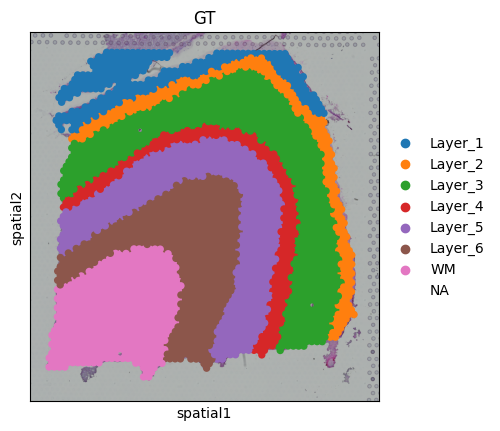

In [29]:
sc.pl.spatial(adata_list_7[7], img_key="hires", library_id='151676', color=['GT'],size=10)